# Продуктовая аналитика интернет магазина спортивных товаров

**Цель исследования** —  составить портрет пользователя. Определить эффективность добавления баннера на главную страницу сайта. 

**Описание проекта**

Заказчик - Интернет-магазин спортивных товаров: одежда, обувь, аксессуары и спортивное питание.

На главной странице магазина показывают пользователям баннеры, чтобы стимулировать продажи. Теперь там случайным образом отображается один из 5 баннеров. Каждый баннер рекламирует определенный продукт или всю компанию. Маркетологи считают, что впечатления от баннеров могут различаться в зависимости от сегмента, а их эффективность может зависеть от особенностей поведения пользователей.

Также у менеджера компании было предложение от партнеров продать это место за баннер и рекламировать там другую услугу (оплата предполагается по модели CPC, то есть за клик).


## Описание данных

Данные взяты из открытого доступа платформы `kaggle`.

Структура таблицы `df`:
- `order_id` - уникальный номер покупки
- `user_id` - уникальный идентификатор клиента
- `page_id` - уникальный номер страницы для пакета событий
- `product` - баннер продукта / компании
- `site_version` - версия сайта (мобильная или десктопная)
- `time` - время действия
- `title` - тип события (показ, клик или покупка)
- `target` - покупка целевого события

## Обзор данных

### Открыть файл с данными и изучить общую информацию

Импортирую библиотеки.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots # библиотека plotly для subplots
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

Считываю данные из файла и сохраню их в датафрейм `df`.

In [2]:
import os

pth1 = '/Users/pesotskayakatya/Desktop/pet-поекты/product.csv'
pth2 = 'https://www.kaggle.com/datasets/podsyp/how-to-do-product-analytics/download?datasetVersionNumber=1'

if os.path.exists(pth1):
    df = pd.read_csv('/Users/pesotskayakatya/Desktop/pet-поекты/product.csv')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something wrong')

Выведу первые 5 строчек всех датафрейма на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены.

In [3]:
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


Выведу основную информацию о датафрейме.

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   order_id      8471220 non-null  object
 1   user_id       8471220 non-null  object
 2   page_id       8471220 non-null  object
 3   product       8471220 non-null  object
 4   site_version  8471220 non-null  object
 5   time          8471220 non-null  object
 6   title         8471220 non-null  object
 7   target        8471220 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


В таблице 8 столбцов и 8471220 строки: 
- 1 столбец - тип данных int;
- 7 столбца - тип данных object.

1. Названия столбцов корректные.

2. Столбец time следует привести к типу datetime. 

3. Пропуски данных отсутствуют. 

Согласно документации к данным:
Структура таблицы `df`:
- `order_id` - уникальный номер покупки
- `user_id` - уникальный идентификатор клиента
- `page_id` - уникальный номер страницы для пакета событий
- `product` - баннер продукта / продукт ('sneakers', 'sports_nutrition', 'company', 'accessories', 'clothes')
- `site_version` - версия сайта (мобильная или десктопная)
- `time` - время действия
- `title` - тип события (показ, клик или покупка)
- `target` - покупка целевого события

## Предобработка данных

### Изменение типа данных

In [5]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   order_id      8471220 non-null  object        
 1   user_id       8471220 non-null  object        
 2   page_id       8471220 non-null  object        
 3   product       8471220 non-null  object        
 4   site_version  8471220 non-null  object        
 5   time          8471220 non-null  datetime64[ns]
 6   title         8471220 non-null  object        
 7   target        8471220 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 517.0+ MB


В столбце title упрощу запись и переименую banner_click в click, а banner_show в show

In [7]:
df['title'] = df['title'].str.replace('banner_click', 'click') 
df['title'] = df['title'].str.replace('banner_show', 'show') 

In [8]:
# проверка

df['title'].unique()

array(['click', 'show', 'order'], dtype=object)

Создам новые столбцы 'week_day', 'month', 'year' с днем недели, месяцем и годом действия пользователя.

In [9]:
df['week_day'] = df['time'].dt.weekday

In [10]:
df['month'] = pd.DatetimeIndex(df['time']).month

In [11]:
df['year'] = pd.DatetimeIndex(df['time']).year

In [12]:
df['date'] = pd.to_datetime(df['time']).dt.date

In [13]:
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target,week_day,month,year,date
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,click,0,4,1,2019,2019-01-11
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,show,0,2,1,2019,2019-01-09
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,show,0,2,1,2019,2019-01-09
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,show,0,3,1,2019,2019-01-03
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,click,0,3,1,2019,2019-01-03


### Исследование дубликатов

In [14]:
df.duplicated().sum()

0

Во время предобработки данных был изменен тип данных столбца time. Дубликатов и пропусков нет.

## Исследовательский анализ

### Выясню, какой версией сайта чаще пользуются

In [16]:
ratio_site_version = round(df['site_version'].value_counts(sort=True, ascending=False)*100/df.shape[0], 2)

In [17]:
palette = sns.color_palette("flare", n_colors=len(ratio_site_version.index))


In [18]:
def plot_bar(x, y, title, x_label, y_label, color_palette=None, horizontal=False):
    """
    Эта функция отображает вертикальную (горизонтальную) столбчатую диаграмму 
    """
    fig, axes = plt.subplots(1, 1, figsize=(14, 5))
    if horizontal:
        axes.barh(y, x, color=palette)
        for p in axes.patches:
            axes.annotate(p.get_width(), (p.get_width() + 0.075, p.get_y() + p.get_height()/2.5), horizontalalignment='left')
        axes.set_ylabel(y_label)
        axes.set_xlabel(x_label)
        axes.set_title(title)
    else: 
        axes.bar(y, x, color=palette)
        for p in axes.patches:
            print(p)
            axes.annotate(p.get_height(), (p.get_x() + p.get_width()/2.5, p.get_height() + 0.075))
    axes.set_ylabel(y_label)
    axes.set_xlabel(x_label)
    axes.set_title(title)
    plt.show()

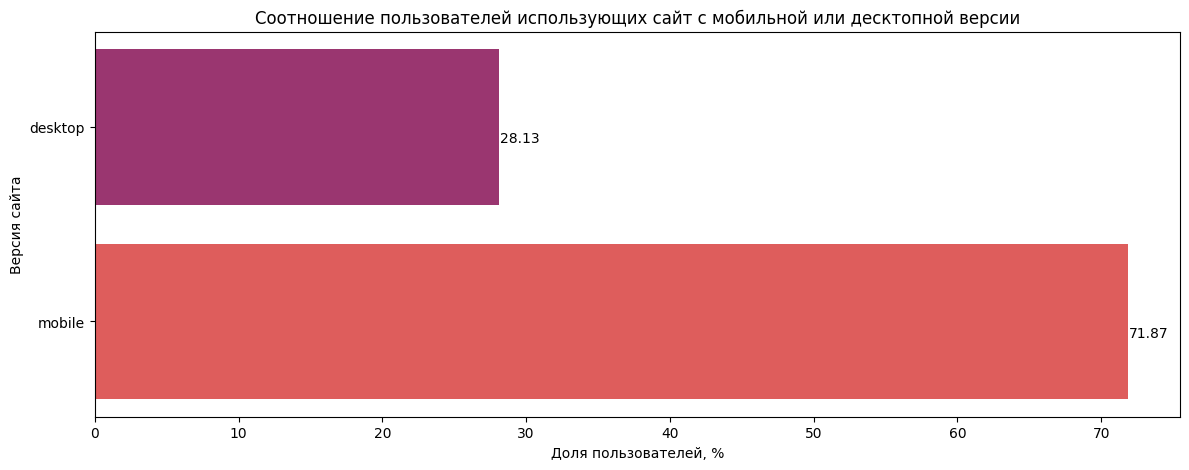

In [19]:
plot_bar(
      x = ratio_site_version.values,
      y = ratio_site_version.index,
      title='Соотношение пользователей использующих сайт с мобильной или десктопной версии', 
      x_label='Доля пользователей, %',
      y_label='Версия сайта',
      color_palette = palette, 
      horizontal=True)

**Вывод**

72% пользователей заходят в приложеине с телефона, и 28% - с компьютера

### Исследую, соотношение показов банера и их типы

In [20]:
ratio_product = round(df['product'].value_counts(sort=True, ascending=False)*100/df.shape[0], 2)

In [21]:
palette = sns.color_palette("flare", n_colors=len(ratio_product.index))

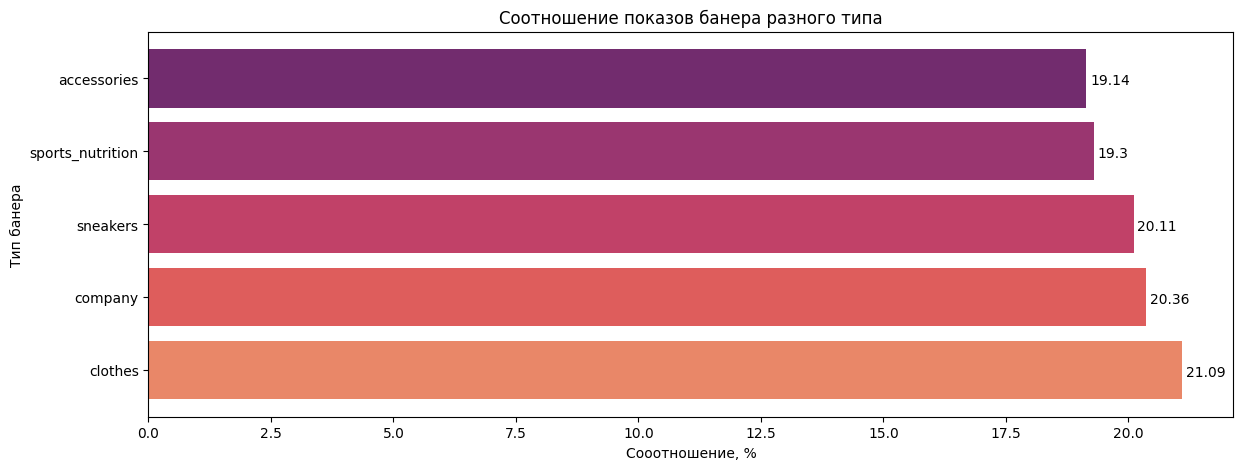

In [22]:
plot_bar(
      x = ratio_product.values,
      y = ratio_product.index,
      title='Соотношение показов банера разного типа', 
      x_label='Сооотношение, %',
      y_label='Тип банера',
      color_palette = palette, 
      horizontal=True)

**Вывод**

Практически в одинаковом соотношении показываются баннеры. Немного чаще показываются баннеры с одеждой и самой компанией.

### Исследую соотношение типа события show (показ), click (клик) или order (покупка)

In [23]:
ratio_title = round(df['title'].value_counts(sort=True, ascending=False)*100/df.shape[0], 2)

show     87.28
click     9.79
order     2.94
Name: title, dtype: float64

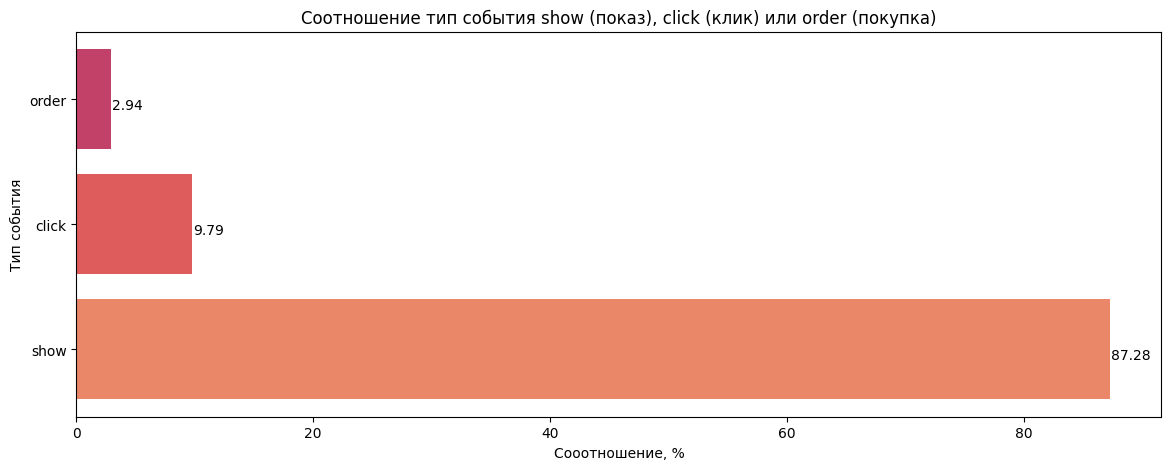

In [24]:
plot_bar(
      x = ratio_title.values,
      y = ratio_title.index,
      title='Соотношение тип события show (показ), click (клик) или order (покупка)', 
      x_label='Сооотношение, %',
      y_label='Тип события',
      color_palette = palette, 
      horizontal=True)

**Вывод**

Всего 87% показов, 10% - клики и 3% - покупки.

### Исследую изменение количество событий во времени

Количество просмотров баннеров лидирует по сравнению с кликами и показами, поэтому построю 2 графика.

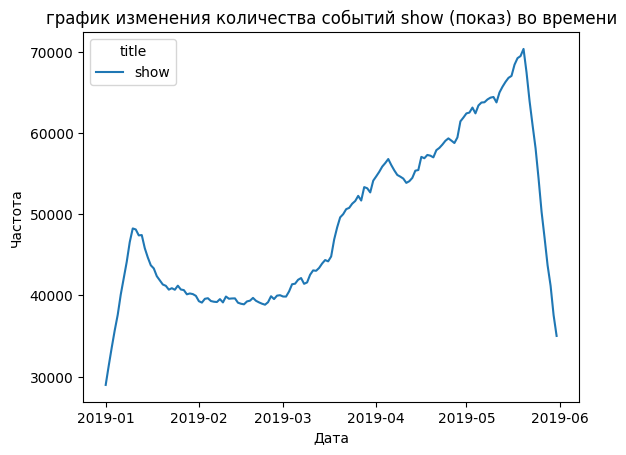

In [166]:
df.query('title == "show"') \
  .pivot_table(index='date', columns='title', values='user_id', aggfunc='count')\
  .plot(kind='line',
        xlabel='Дата',
        ylabel='Частота',
        title='график изменения количества событий show (показ) во времени');

**Вывод**

Для показов баннера наблюдаются пиковые значения в начале января, апреля и мая. Наибольший пик в начале мая. В феврале и марте показы проседают.

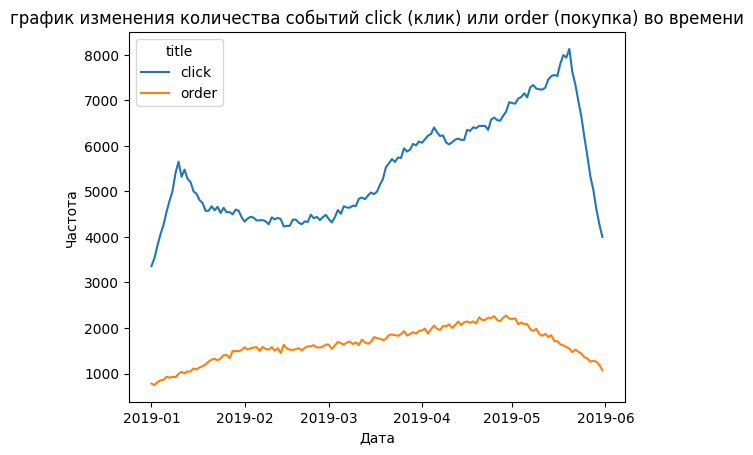

In [164]:
df.query('title != "show"') \
  .pivot_table(index='date', columns='title', values='user_id', aggfunc='count')\
  .plot(kind='line',
        xlabel='Дата',
        ylabel='Частота',
        title='график изменения количества событий click (клик) или order (покупка) во времени');

**Вывод**

Для кликов сохраняется такая же тенденция, что и у показов. Что логично, с ростом показов наблюдается рост кликов. Однако такого же не скажешь о покупках. Но в целом количество покупок наибольшее в мае. 

**Вероятно, у продаваемых продуктов наблюдается сезонность. Растут продажи в начале весны(март) и пиковые перед летом (в мае).**

### Исследую количество продаж по дням недели

In [170]:
total_sales_weekday = df.groupby('week_day').agg({'order_id' : 'nunique'})

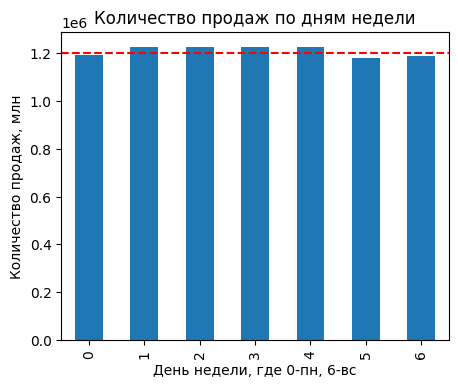

In [171]:
total_sales_weekday.plot(kind='bar', 
                         figsize= (5,4),
                         legend=False,
                         title='Количество продаж по дням недели', 
                         xlabel='День недели, где 0-пн, 6-вс',
                         ylabel='Количество продаж, млн',);

# добавляем ось X
plt.axhline(y=1200000, color='red', linestyle='--');

**Вывод**

В будни со вторника по пятницу продажи выше, чем в выходные. Однака разница не вилика.

### Исследую количество продаж по дням недели в зависимости от типа устройства

In [155]:
df_site_version_weekday = df.pivot_table(index=['week_day'], 
                                         columns='site_version', 
                                         values='order_id', 
                                         aggfunc='nunique')
df_site_version_weekday

site_version,desktop,mobile
week_day,,
0,339719,854393
1,343621,883297
2,343974,884138
3,343927,884415
4,343177,882844
5,330616,848936
6,337851,850312


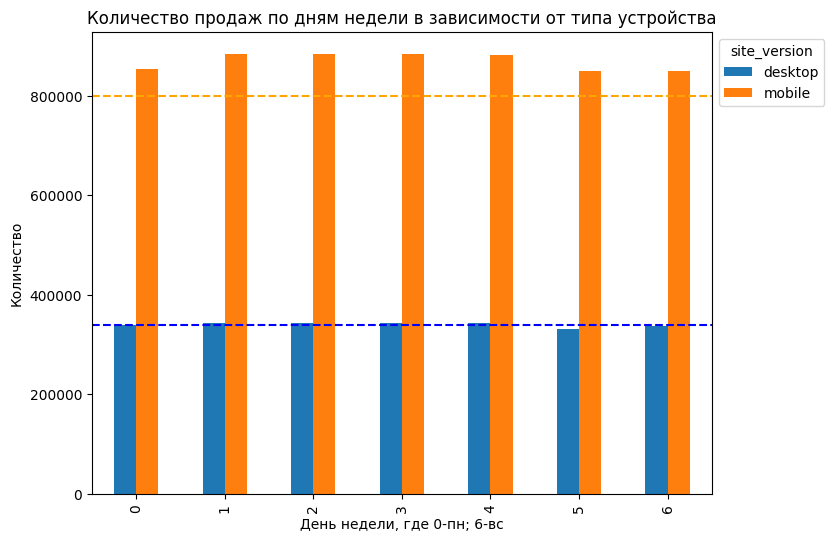

In [156]:
df_site_version_weekday.plot(kind='bar', 
                             figsize= (8,6),
                             legend=False,
                             title='Количество продаж по дням недели в зависимости от типа устройства',
                             xlabel='День недели, где 0-пн; 6-вс',
                             ylabel='Количество продаж',);

# добавляем ось X
plt.axhline(y=800000, color='orange', linestyle='--');
plt.legend(loc='upper left', title='site_version', bbox_to_anchor=(1.0, 1.0));

# добавляем ось X
plt.axhline(y=340000, color='blue', linestyle='--');
plt.legend(loc='upper left', title='site_version', bbox_to_anchor=(1.0, 1.0)); 

**Вывод**

В разрезе устройства пользователя, больше всего продаж с мобильного приложения. Вероятно им чаще пользуются. В будни покупок немного больше чем в выходные, вероятно в выходные больше свободного времени и пользователи реже смотрят приложение.

### Исследую количество продаж по месяцам

In [128]:
total_sales_month = df.groupby('month').agg({'order_id' : 'nunique'})

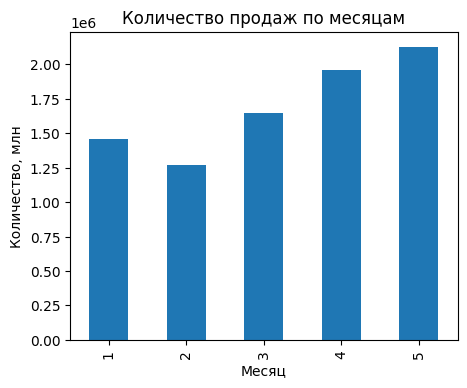

In [132]:
total_sales_weekday.plot(kind='bar', 
                         figsize= (5,4),
                         legend=False,
                         title='Количество продаж по месяцам', 
                         xlabel='Месяц',
                         ylabel='Количество продаж, млн',);

**Вывод**

Как и было обнаружено выше по количеству продаж лидирует май, с марта наблюдается значительная тенденция к увеличению продаж.

### Исследую количество продаж по месяцам в зависимости от типа устройства

In [157]:
df_site_version_month = df.pivot_table(index=['month'], 
                                         columns='site_version', 
                                         values='order_id', 
                                         aggfunc='nunique')
df_site_version_month

site_version,desktop,mobile
month,,
1,400441,1060654
2,361507,907708
3,475986,1174729
4,570951,1389136
5,574000,1556108


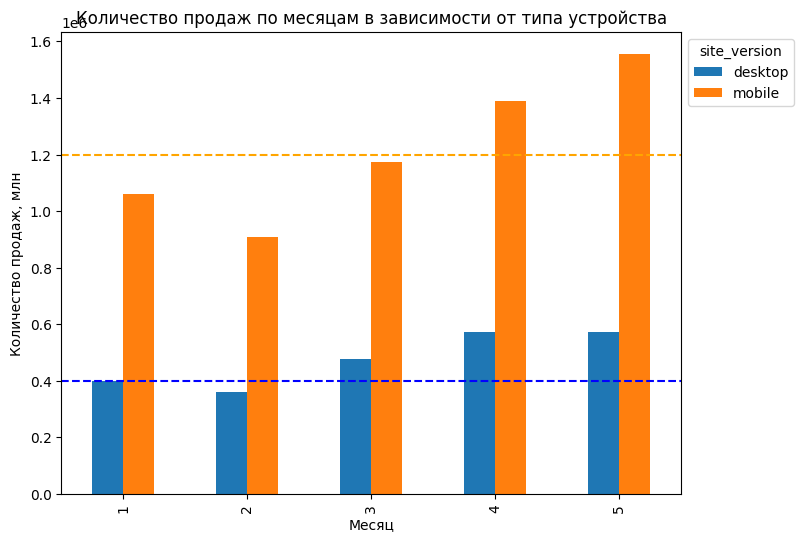

In [161]:
df_site_version_month.plot(kind='bar', 
                             figsize= (8,6),
                             legend=False,
                             title='Количество продаж по месяцам в зависимости от типа устройства',
                             xlabel='Месяц',
                             ylabel='Количество продаж, млн',);

# добавляем ось X
plt.axhline(y=1200000, color='orange', linestyle='--');
plt.legend(loc='upper left', title='site_version', bbox_to_anchor=(1.0, 1.0));

# добавляем ось X
plt.axhline(y=400000, color='blue', linestyle='--');
plt.legend(loc='upper left', title='site_version', bbox_to_anchor=(1.0, 1.0)); 

**Вывод**

По месяцам также видно, что пользователи покупают чаще с мобильного приложения.

**В итоге:**
- пользователи покупают чаще с мобильного приложения
- наблюдается рост продаж с марта по мая
- выявляется сезонность: рост продаж в начале весны и перед летом
- в будни, пользоватлели чаще покупают

### Исследую динамику изменения событий в зависимости от типа банера для кликов и покупок с телефона и компьютера

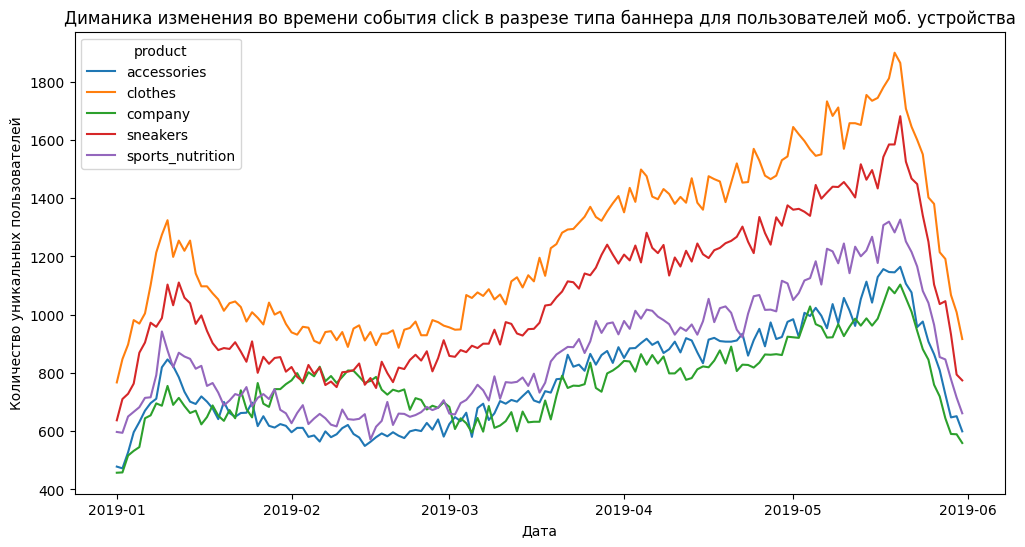

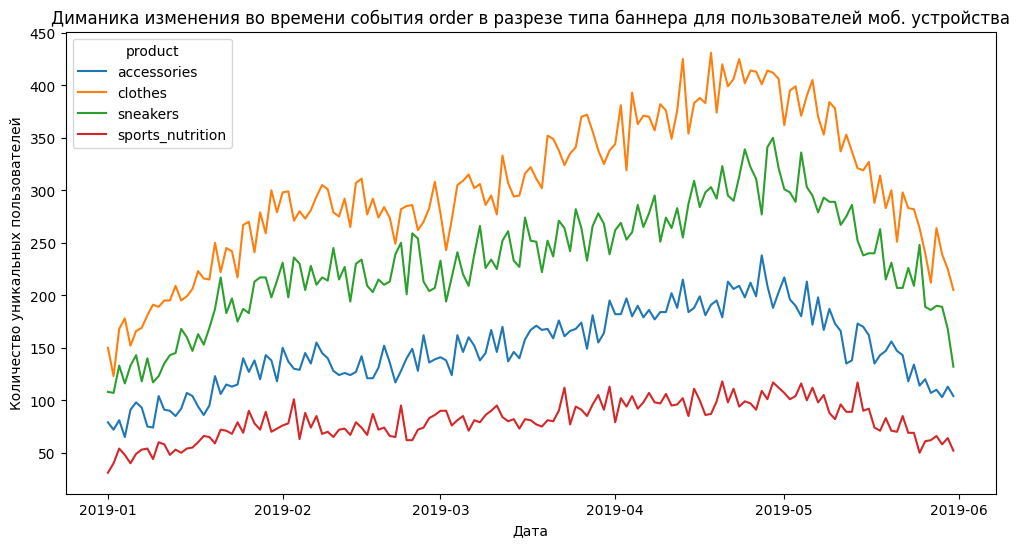

In [32]:
mobile = df.query('site_version == "mobile"')
for t in ['click', 'order']:
    mobile.query('title == @t')\
      .pivot_table(index='date', columns='product', values='user_id', aggfunc='nunique').reset_index()\
      .plot(x='date', 
            kind='line', 
            figsize=(12,6),
            title=f'Диманика изменения во времени события {t} в разрезе типа баннера для пользователей моб. устройства',
            xlabel='Дата',
            ylabel='Количество уникальных пользователей')

**Вывод:**

Пользователи моб. устройства чаще кликают на баннеры с одеждой, кроссовками (1500 уникальных пользователей). Меньше всего на баннера с компанией и аксессуарами.

Пользователи моб. устройства чаще заказывают одежду и кроссовки(до 300-400 уникальных пользователей). Меньше всего - спортивное питание, таких уникальных пользователей чуть меньше 100. 


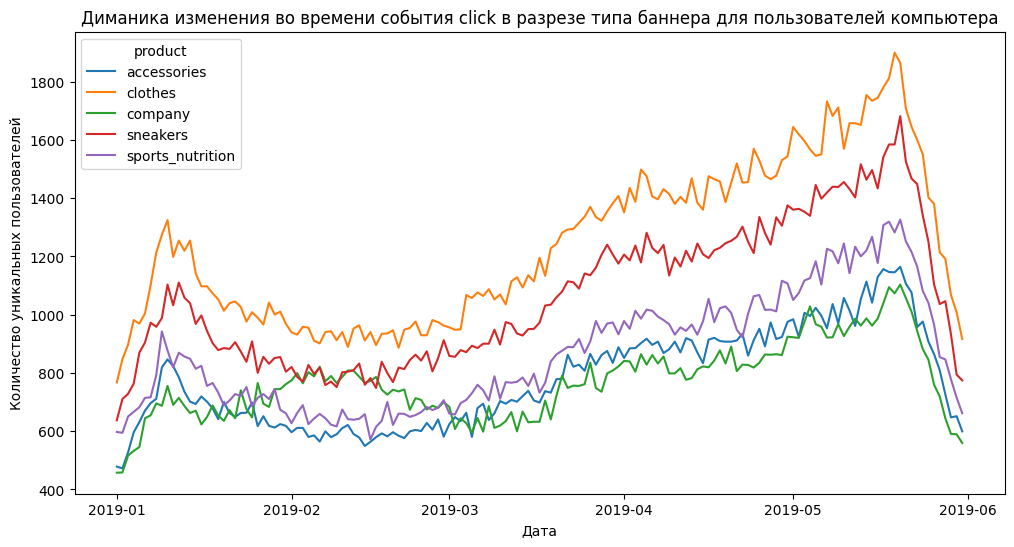

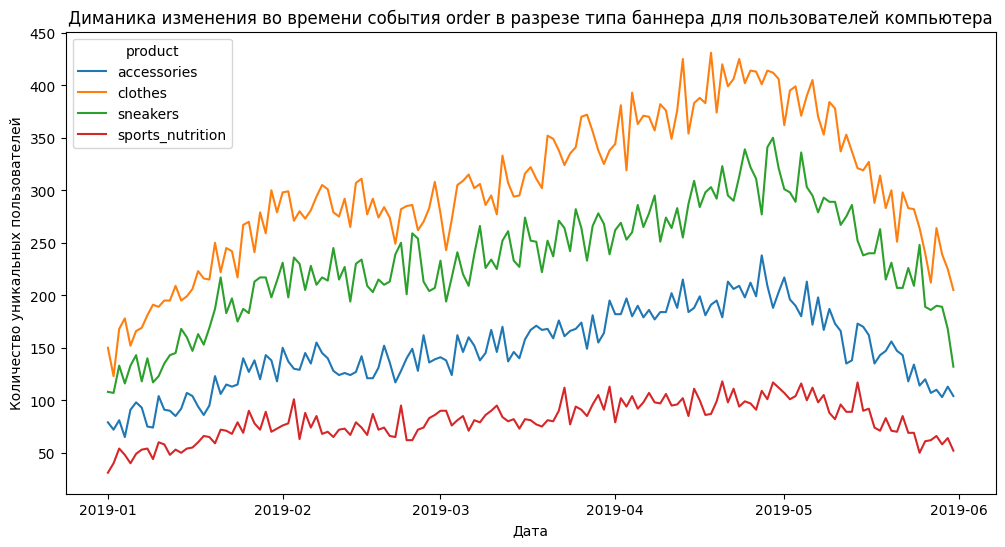

In [33]:
desktop = df.query('site_version == "desktop"')
for t in ['click', 'order']:
    mobile.query('title == @t')\
      .pivot_table(index='date', columns='product', values='user_id', aggfunc='nunique').reset_index()\
      .plot(x='date', 
            kind='line', 
            figsize=(12,6),
            title=f'Диманика изменения во времени события {t} в разрезе типа баннера для пользователей компьютера',
            xlabel='Дата',
            ylabel='Количество уникальных пользователей')

**Вывод:**

Пользователи компьютера чаще кликают на баннеры с одеждой, кроссовками (более 1200 уникальных пользователей). Меньше всего на баннера с компанией и аксессуарами.

Пользователи компьютера чаще заказывают одежду и кроссовки(до 300-400 уникальных пользователей). Меньше всего - спортивное питание, таких уникальных пользователей чуть меньше 100. 

**Итоговый вывод:** наиболее популярные баннеры с с одеждой, кроссовками. На них чаще кликают и оформляют заказ. А вот над баннером спортивного питания следует поработать или вовсе убрать.

### Построю ворнку конверсии событий

In [37]:
# задаю цвета для визуализации воронки
colors =["#20B2AA","#FA8072","#DDA0DD"]

In [177]:
from plotly.subplots import make_subplots # библиотека plotly для subplots
from plotly import graph_objects as go

fig = make_subplots(rows=1, cols=2,subplot_titles=("Воронка конверсии событий","Воронка конверсии событий в шаг события"))

# задаю название полей оси У
titles_name = ['Показ баннера', 'Клик по баннеру', 'Покупка']

# строю воронку конверсии
fig.add_trace(go.Funnel(
        y = titles_name,
        x = df.groupby('title').agg({'user_id' : 'nunique'})\
              .reset_index().sort_values('user_id', ascending = False)['user_id'] ,
        textinfo = "value+percent initial", # процент начального (первого шага)
        marker = {"color": colors[0]}, # цвет блоков
        connector = {"fillcolor": '#bde0eb'}, # цвет области, переходящей между шагами
        insidetextfont = {'color': 'white', 'size': 12} # цвет индексов
        ),row=1, col=1)

# строю воронку конверсии в шаг события
fig.add_trace(go.Funnel(
        y = df.groupby('title').agg({'user_id' : 'nunique'})\
              .reset_index().sort_values('user_id', ascending = False)['title'],
        x = df.groupby('title').agg({'user_id' : 'nunique'})\
              .reset_index().sort_values('user_id', ascending = False)['user_id'],
        textinfo = "value+percent previous", # процент предыдущего
        marker = {"color": colors[0]}, # цвет блоков
        connector = {"fillcolor": '#bde0eb'}, # цвет области, переходящей между шагами
        insidetextfont = {'color': 'white', 'size': 14} # цвет индексов
        ),row=1, col=2)

                                                            # width/height - ширина/высота графика
fig.update_layout(showlegend=False, width=1000, height=500) # showlegend - показать/скрыть легенду
fig.layout.yaxis2.update(showticklabels=False) # убираю подпись оси У второго графика
fig.show()

**Вывод**

С показа до покупки доходит только 6% пользователей. В разрезе шаг события с момента показа баннера до клика по нему теряется 83% пользователей, что очень большая потеря. А до покупки после клика доходит только 32% пользователей. 

**Следует поработать над креативом баннера, так как после их показа теряется 83% пользователей.**

### Исследую конверсию для пользователей телефона и компьютера

In [179]:
funnel_mobile = df.query('site_version == "mobile"').groupby('title')\
            .agg(total_users=('user_id', 'nunique')).sort_values(by='total_users', ascending=False).reset_index()
funnel_mobile['conv_per_step'] = funnel_mobile['total_users'] / funnel_mobile['total_users'].shift(1, fill_value=2857187)
funnel_mobile['conv_per_step'] = funnel_mobile['conv_per_step'].map('{:.0%}'.format)
funnel_mobile['conv'] = funnel_mobile['total_users'] / funnel_mobile['total_users'].max()
funnel_mobile['conv'] = funnel_mobile['conv'].map('{:.0%}'.format)
print('Конверсия в разбивке по устройству "mobile"')
funnel_mobile

Конверсия в разбивке по устройству "mobile"


,title,total_users,conv_per_step,conv
0,show,2857187,100%,100%
1,click,631644,22%,22%
2,order,112574,18%,4%


In [180]:
funnel_desktop = df.query('site_version == "desktop"').groupby('title')\
            .agg(total_users=('user_id', 'nunique')).sort_values(by='total_users', ascending=False).reset_index()
funnel_desktop['step'] = ['1', '3', '2']
funnel_desktop = funnel_desktop.sort_values(by='step', ascending=True)
funnel_desktop['conv_per_step'] = funnel_desktop['total_users'] / funnel_desktop['total_users'].shift(1, fill_value=1424771)
funnel_desktop['conv_per_step'] = funnel_desktop['conv_per_step'].map('{:.0%}'.format)
funnel_desktop['conv'] = funnel_desktop['total_users'] / funnel_desktop['total_users'].max()
funnel_desktop['conv'] = funnel_desktop['conv'].map('{:.0%}'.format)
print('Конверсия в разбивке по устройству "desktop" без учета последовательности цепочки конверсии: показ, клик, покупка')

funnel_desktop

Конверсия в разбивке по устройству "desktop" без учета последовательности цепочки конверсии: показ, клик, покупка


,title,total_users,step,conv_per_step,conv
0,show,1424771,1,100%,100%
2,click,111334,2,8%,8%
1,order,125404,3,113%,9%


**Вывод**

Из пользователей телефона конверсия в покупку состаляет 4%, это неплохо. Однако все равно большая часть пользователей не кликает по баннеру, теряется 78% пользователей.

У пользователей компьютера наоборот конверсия в покупку выше и составляет 9%

**Итоговый вывод: пользователи компьютера лучше конвертируются, хотя их количество намного меньше чем пользоватлей телефонов. Тенденция к тому, что большинство пользоватлей не кликают на баннер сохраняется**

### Исследую конверсию для пользователей в зависимости от типа баннера

In [43]:
for t in df['product'].unique():
    funnel_product = df.query('product == @t')\
                       .groupby('title')\
                       .agg(total_users=('user_id', 'nunique'))\
                       .sort_values(by='total_users', ascending=False)\
                       .reset_index()
    funnel_product['conv_per_step'] = funnel_product['total_users'] / \
                                      funnel_product['total_users'].shift(1, fill_value=0)
    
    funnel_product['conv_per_step'] = funnel_product['conv_per_step'].map('{:.0%}'.format)
    
    funnel_product['conv'] = funnel_product['total_users'] / funnel_product['total_users'].max()
    
    funnel_product['conv'] = funnel_product['conv'].map('{:.0%}'.format)
    print('Conversion for product', t)
    print(funnel_product)
    print()
    

Conversion for product sneakers
   title  total_users conv_per_step  conv
0   show      1163806          inf%  100%
1  click       174801           15%   15%
2  order        66917           38%    6%

Conversion for product sports_nutrition
   title  total_users conv_per_step  conv
0   show      1173163          inf%  100%
1  click       139854           12%   12%
2  order        23609           17%    2%

Conversion for product company
   title  total_users conv_per_step  conv
0   show      1256719          inf%  100%
1  click       140683           11%   11%

Conversion for product accessories
   title  total_users conv_per_step  conv
0   show      1155775          inf%  100%
1  click       131998           11%   11%
2  order        44160           33%    4%

Conversion for product clothes
   title  total_users conv_per_step  conv
0   show      1164914          inf%  100%
1  click       210109           18%   18%
2  order       110347           53%    9%



**Вывод**

Наибольшая конверсия в покупку у баннера с одеждой (9%), с кроссовками(6%). Наименьшая у баннера со спортивным питание (2%). 

### Исследую распределение событий в зависимости от продукта

In [44]:
funnel_product_title = df.pivot_table(index='title', columns='product', values='user_id', aggfunc='nunique').reset_index()\
                         .sort_values(by='accessories', ascending=False)
funnel_product_title 

product,title,accessories,clothes,company,sneakers,sports_nutrition
2,show,1155775.0,1164914.0,1256719.0,1163806.0,1173163.0
0,click,131998.0,210109.0,140683.0,174801.0,139854.0
1,order,44160.0,110347.0,NaN,66917.0,23609.0


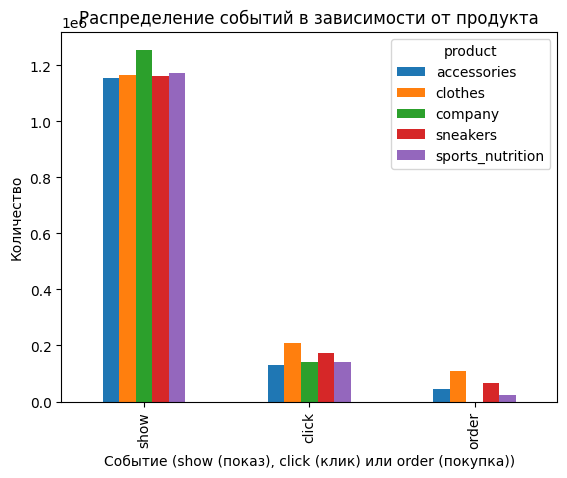

In [45]:
funnel_product_title.plot(x='title', kind='bar',
                         title='Распределение событий в зависимости от продукта',
                         xlabel='Событие (show (показ), click (клик) или order (покупка))',
                         ylabel='Количество',);


**Вывод**

По показам лидирует баннер компании и спортивного питания. Но спортивное питание плохо кликают и покупают, по сравнению с одеждой и кроссовками. Следует сменить акцент и направить трафик на баннеры одежда и кроссовки.

## Общий вывод

1. Большая часть пользователей используют телефон. 72% пользователей заходят в приложеине с телефона, и 28% - с компьютера
2. Практически в одинаковом соотношении показываются баннеры. Немного чаще показываются баннеры с одеждой и самой компанией.
3. Соотношение событий следующее:87% - показы, 10% - клики и 3% - покупки.
4. У продаваемых продуктов наблюдается сезонность. Растут продажи в начале весны(март) и пиковые перед летом (в мае). А также в будни
5. Пользователи покупают чаще с мобильного приложения
6. Наиболее популярные баннеры с с одеждой, кроссовками. На них чаще кликают и оформляют заказ. А вот над баннером спортивного питания следует поработать или вовсе убрать. 

## Выводы после анализа конверсии:
1. Следует поработать над креативом баннера, так как после их показа теряется 83% пользователей.
2. Из пользователей телефона конверсия в покупку состаляет 4%. У пользователей компьютера наоборот конверсия в покупку составляет 9%.
3. Пользователи компьютера лучше конвертируются, хотя их количество намного меньше чем пользоватлей телефонов. 
4. Наибольшая конверсия в покупку у баннера с одеждой (9%), с кроссовками(6%). Наименьшая у баннера со спортивным питание (2%). 
5. По показам лидирует баннер компании и спортивного питания. Но спортивное питание плохо кликают и покупают, по сравнению с одеждой и кроссовками. 

## Рекомендации
1. Продвигать предложения лучше в феврале и апреле.
2. Продвигать предложения лучше в середине будних дней
3. Продвигать лучше баннеры с одеждой и кроссовками, убрать трафик со спортивного питания
4. Проработать дизайн баннеров или добавить на них мотивацию к покупке, так как конверсия из показов в клики крайне низка.
